In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [2]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
K = 140  # количество повторений для оценки gamma*

In [3]:
gamma_star_list = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s2 = np.var(X, ddof=1)
    delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
    sigma2_left = (n - 1) * s2 / delta_0
    sigma2_right = (n - 1) * s2 / delta_1
    # Проверяем, попадает ли истинная дисперсия в интервал
    if sigma2_left <= sigma2 <= sigma2_right:
        gamma_star_list.append(1)
    else:
        gamma_star_list.append(0)

gamma_star = np.mean(gamma_star_list)
print(f"1. Фактическая γ*: {gamma_star}")

1. Фактическая γ*: 0.9057142857142857


In [4]:
# 2. Повторить пункт 1, K раз, для получения массива gamma*
gamma_star_values = []

for _ in range(K):
    gamma_star_list = []
    for _ in range(M):
        X = np.random.normal(a, sigma, size=n)
        s2 = np.var(X, ddof=1)
        delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
        delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
        sigma2_left = (n - 1) * s2 / delta_0
        sigma2_right = (n - 1) * s2 / delta_1
        if sigma2_left <= sigma2 <= sigma2_right:
            gamma_star_list.append(1)
        else:
            gamma_star_list.append(0)
    gamma_star_values.append(np.mean(gamma_star_list))

In [5]:
# Характеристики распределения gamma*
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values)

print(f"2. Математическое ожидание γ*: {mean_gamma_star}")
print(f"2. Дисперсия γ*: {var_gamma_star}")


2. Математическое ожидание γ*: 0.9103591836734695
2. Дисперсия γ*: 3.9654077467721755e-05


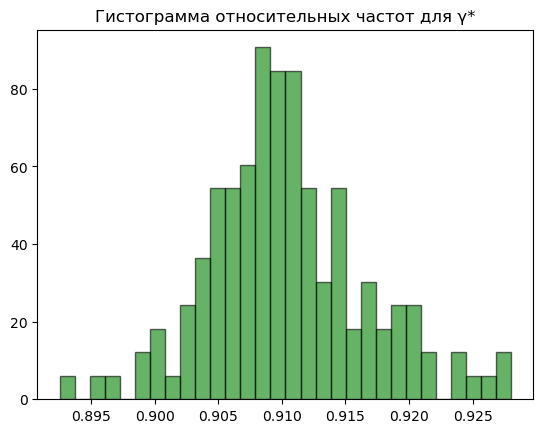

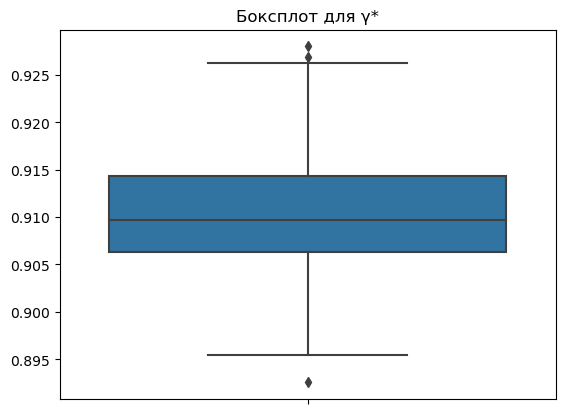

In [6]:
# Построение гистограммы и боксплота
plt.hist(gamma_star_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title("Гистограмма относительных частот для γ*")
plt.show()

sb.boxplot(y=gamma_star_values)
plt.title("Боксплот для γ*")
plt.show()

In [ ]:
# 3 Смоделировать M выборок из n значений СВ W
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
count_g = 0
M_variance_array = []
for i in range(M):
    W = []
    for j in range(n):
        U = np.random.exponential(scale = true_a, size=sample_size_U)
        W_i = sum(U) / 7
        W.append(W_i)
    s2_W = np.var(W, ddof = 1)
    d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
    d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
    s2_low = (n-1) * s2_W / d_high
    s2_high = (n-1) * s2_W / d_low
    if s2_low <= true_variance_W <= s2_high: 
        count_g += 1
    M_variance_array.append((s2_low,s2_high))
gamma_star = count_g/M
print("Доверительные интервалы для каждой из M выборок: ", M_variance_array)
print("Точечная оценка gamma*: ", gamma_star)
#Примечание: Отклонение оценки от настоящей gamma обусловлено малой выборкой из U, обычно она должна быть >25

Доверительные интервалы для каждой из M выборок:  [(1.6837548546945167, 5.1907767460994405), (0.8115741044017555, 2.5019675382788553), (0.5218259992424441, 1.6087153393058626), (0.8780926611984268, 2.7070347883251222), (0.8300834861937019, 2.559029329858808), (0.7126749949955626, 2.197075649840173), (0.791866467080301, 2.4412116953225316), (1.0936107926403025, 3.371446535636317), (0.5740936184458246, 1.7698489755822147), (0.6256179350301264, 1.9286911155996718), (0.6653686173804964, 2.0512368157712806), (0.837605466269031, 2.582218524622392), (1.2157547676589062, 3.747999038772381), (0.5314673533602184, 1.63843826281573), (1.0695163297650776, 3.297166733411091), (0.6511839489830282, 2.0075075005069944), (0.6124011767243682, 1.8879457294877526), (0.44471617356462495, 1.3709967136352486), (0.3308620752532775, 1.0200007213654085), (0.4529506002691753, 1.3963822800294698), (0.45547638418944014, 1.404168912627694), (0.6735341580439573, 2.0764100162980954), (1.1141191953063987, 3.43467102426

In [33]:
# 4 Смоделировать K выборок из M, получение массива gamma_star
sample_size_U = 7
true_variance_u = 9
true_variance_W = true_variance_u/sample_size_U
true_a = 3
gamma_star_values = []
for _ in range(K):
    count_g = 0
    for i in range(M):
        W = []
        for j in range(n):
            U = np.random.exponential(scale = true_a, size=sample_size_U)
            W_i = sum(U) / 7
            W.append(W_i)
        s2_W = np.var(W, ddof = 1)
        d_high = st.chi2.ppf(1/2+gamma/2, df = n-1)
        d_low = st.chi2.ppf(1/2-gamma/2, df = n-1)
        s2_low = (n-1) * s2_W / d_high
        s2_high = (n-1) * s2_W / d_low
        if s2_low <= true_variance_W <= s2_high: 
            count_g += 1
    gamma_star = count_g/M
    gamma_star_values.append(gamma_star)

In [34]:
# Выборочные числовые характеристики
mean_gamma_star = np.mean(gamma_star_values)
var_gamma_star = np.var(gamma_star_values, ddof=1)
std_gamma_star = np.std(gamma_star_values, ddof=1)
median_gamma_star = np.median(gamma_star_values)

In [35]:
print(f"Среднее значение gamma*: {mean_gamma_star}")
print(f"Дисперсия gamma*: {var_gamma_star}")
print(f"Стандартное отклонение gamma*: {std_gamma_star}")
print(f"Медиана gamma*: {median_gamma_star}")

Среднее значение gamma*: 0.8615224489795917
Дисперсия gamma*: 6.59996392390461e-05
Стандартное отклонение gamma*: 0.008124016201303768
Медиана gamma*: 0.8622857142857143


Text(0, 0.5, 'Относительная частота')

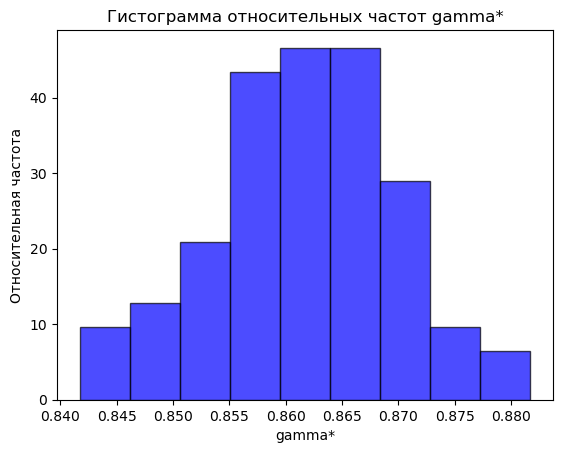

In [36]:
# Гистограмма
plt.hist(gamma_star_values, bins="sturges", density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма относительных частот gamma*')
plt.xlabel('gamma*')
plt.ylabel('Относительная частота')

<Axes: >

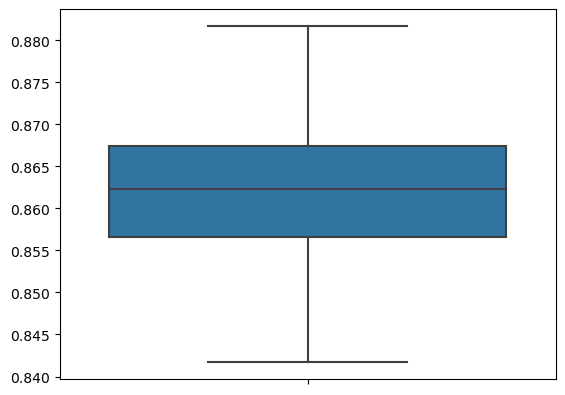

In [ ]:
# Боксплот
sb.boxplot(y = gamma_star_values)

Распределение походит на нормальное?